Numberical simulation

In [10]:
import base, constant
import numpy as np, qiskit
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import importlib
importlib.reload(constant)
importlib.reload(base)

<module 'base' from 'c:\\Users\\haime\\OneDrive\\Documents\\GitHub\\Lagrange interpolation approach for GPRX\\base.py'>

In [4]:
step_sizes = base.create_log_step_sizes(0.001, 3, 0.1)
thetas = np.asarray([np.pi/2, np.pi/3, np.pi/6])
def u(qc, thetas):
    qc.rx(thetas[0], 0)
    qc.rz(thetas[1], 1)
    qc.cry(thetas[2], 0, 1)
    return qc
def f(thetas):
    qc = qiskit.QuantumCircuit(2,2)
    qc = u(qc, thetas)
    return base.measure(qc, [0, 1])

true_grad = base.true_grad(thetas)

mean_grad_stds = []
mean_grad_finites = []
for step_size in step_sizes:
    print(step_size)
    grad_finites = []
    grad_stds = []

    for _ in range(0, 100):
        grad_finite = []
        grad_std = []
        for j in range(0, thetas.shape[0]):
            # if j != 2:
            #     grad_std.append(base.pseudo_two_prx(f, thetas, j, step_size))
            #     # grad_finite.append(base.two_finite_diff(f, thetas_origin, j, step_size))
            # else:
            grad_std.append(base.two_finite_diff(f, thetas, j, step_size))
            grad_finite.append(base.two_finite_diff(f, thetas, j, step_size))
        
        grad_finites.append(grad_finite)
        grad_stds.append(grad_std)
    print(np.mean(grad_stds,axis = 0))
    print(np.mean(grad_finites,axis = 0))
    mean_grad_stds.append(np.mean(grad_stds,axis = 0))
    mean_grad_finites.append(np.mean(grad_finites,axis = 0))
np.savetxt('mean_grad_stds.txt', mean_grad_stds)
np.savetxt('mean_grad_finites.txt', mean_grad_finites)

0.001
[-0.881  0.282 -0.503]
[-0.9265  0.272  -0.474 ]
0.002
[-0.547    0.03175  0.195  ]
[-0.339   -0.28225  0.095  ]
0.003
[-0.71366667  0.42716667  0.1615    ]
[-0.51483333  0.01116667 -0.04233333]
0.004
[-0.483875 -0.1015   -0.10275 ]
[-0.443375  0.00825  -0.04125 ]


In [32]:
step_sizes = np.arange(10**(-2), 1, 10**(-1))
mean_grad_stds = np.asarray(np.loadtxt('mean_grad_stds.txt'))
mean_grad_finites = np.asarray(np.loadtxt('mean_grad_finites.txt'))
e_std = []
for i in range(0, mean_grad_stds.shape[0]):
    e_std.append(mean_squared_error(mean_grad_stds[i], mean_grad_finites[i]))

In [43]:
mean_grad_stds.shape

(150, 3)

### Mean 

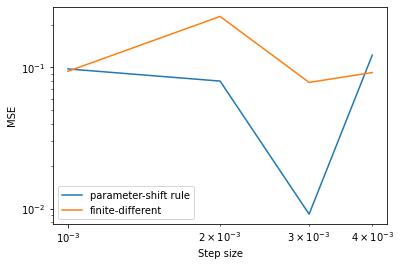

In [5]:
e_std, e_finite = [], []
for i in range(0, step_sizes.shape[0]):
    e_std.append(mean_squared_error(mean_grad_stds[i], true_grad))
    e_finite.append(mean_squared_error(mean_grad_finites[i], true_grad))
plt.plot(step_sizes, e_std, label = "parameter-shift rule")
plt.plot(step_sizes, e_finite,  label = "finite-different")

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Step size")
plt.ylabel("MSE")
plt.legend()

### X

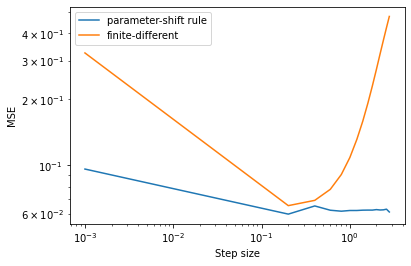

In [57]:
e_std_x, e_finite_x = [], []
for i in range(0, step_sizes.shape[0]):
    e_std_x.append(mean_squared_error([mean_grad_stds[i][0]], [true_grad[0]]))
    e_finite_x.append(mean_squared_error([mean_grad_finites[i][0]], [true_grad[0]]))
plt.plot(step_sizes, e_std_x, label = "parameter-shift rule")
plt.plot(step_sizes, e_finite_x,  label = "finite-different")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Step size")
plt.ylabel("MSE")
plt.legend()

### Y

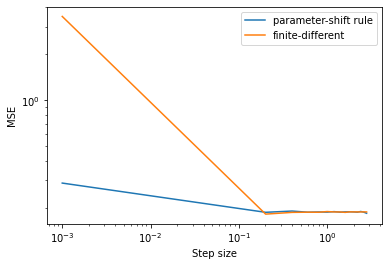

In [58]:
e_std_y, e_finite_y = [], []
for i in range(0, step_sizes.shape[0]):
    e_std_y.append(mean_squared_error([mean_grad_stds[i][1]], [true_grad[1]]))
    e_finite_y.append(mean_squared_error([mean_grad_finites[i][1]], [true_grad[1]]))
plt.plot(step_sizes, e_std_y, label = "parameter-shift rule")
plt.plot(step_sizes, e_finite_y,  label = "finite-different")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Step size")
plt.ylabel("MSE")
plt.legend()